1. Não linearidade na relação preditor-resposta
2. Correlação dos termos de erro
3. Erro com variância não constante
4. Outliers
5. Pontos com vantagem
6. Colinearidade

## 1. Não linearidade na relação preditor-resposta


O modelo linear *assume* que existe uma relação linear entre as variáveis preditoras e a resposta. Quando essa premissa é violada, isto é, quando a *verdadeira* relação entre preditor e resposta está longe de ser linear, então todas as conclusões que foram obtidas são postas suspeitas. Além disso, a acurácia da predição do modelo pode ser reduzida significativamente.

A fim de verificar se este é o caso, iremos plotar o gráfico dos **resíduos** $e_i = y_i - \hat{y}_i$, que basicamente consiste em confrontar o resíduo com a observação $x_i$ (no caso da regressão simples) ou o resíduo com o valor predito (no caso da regressão multivariada).

Esse gráfico **não** deve aparentar nenhum tipo de padrão notável. Caso apresente, há índicio de que essa premissa fora violada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

$$
y = f(X) + \varepsilon
$$

Onde
* $\mathbb{E}(\varepsilon) = 0$
* $\text{Var}(\varepsilon) = \text{cte}$

In [2]:
# Gerando dados quadráticos sintéticos com parcela de erro com média zero e variância constante
n_obs = 40
x = np.linspace(0.3,5,n_obs)
e = np.random.normal(0,2,n_obs)
y_lin = x-3
y_pol = (x-3)**2
y_trs = (np.log(x)-3)**2

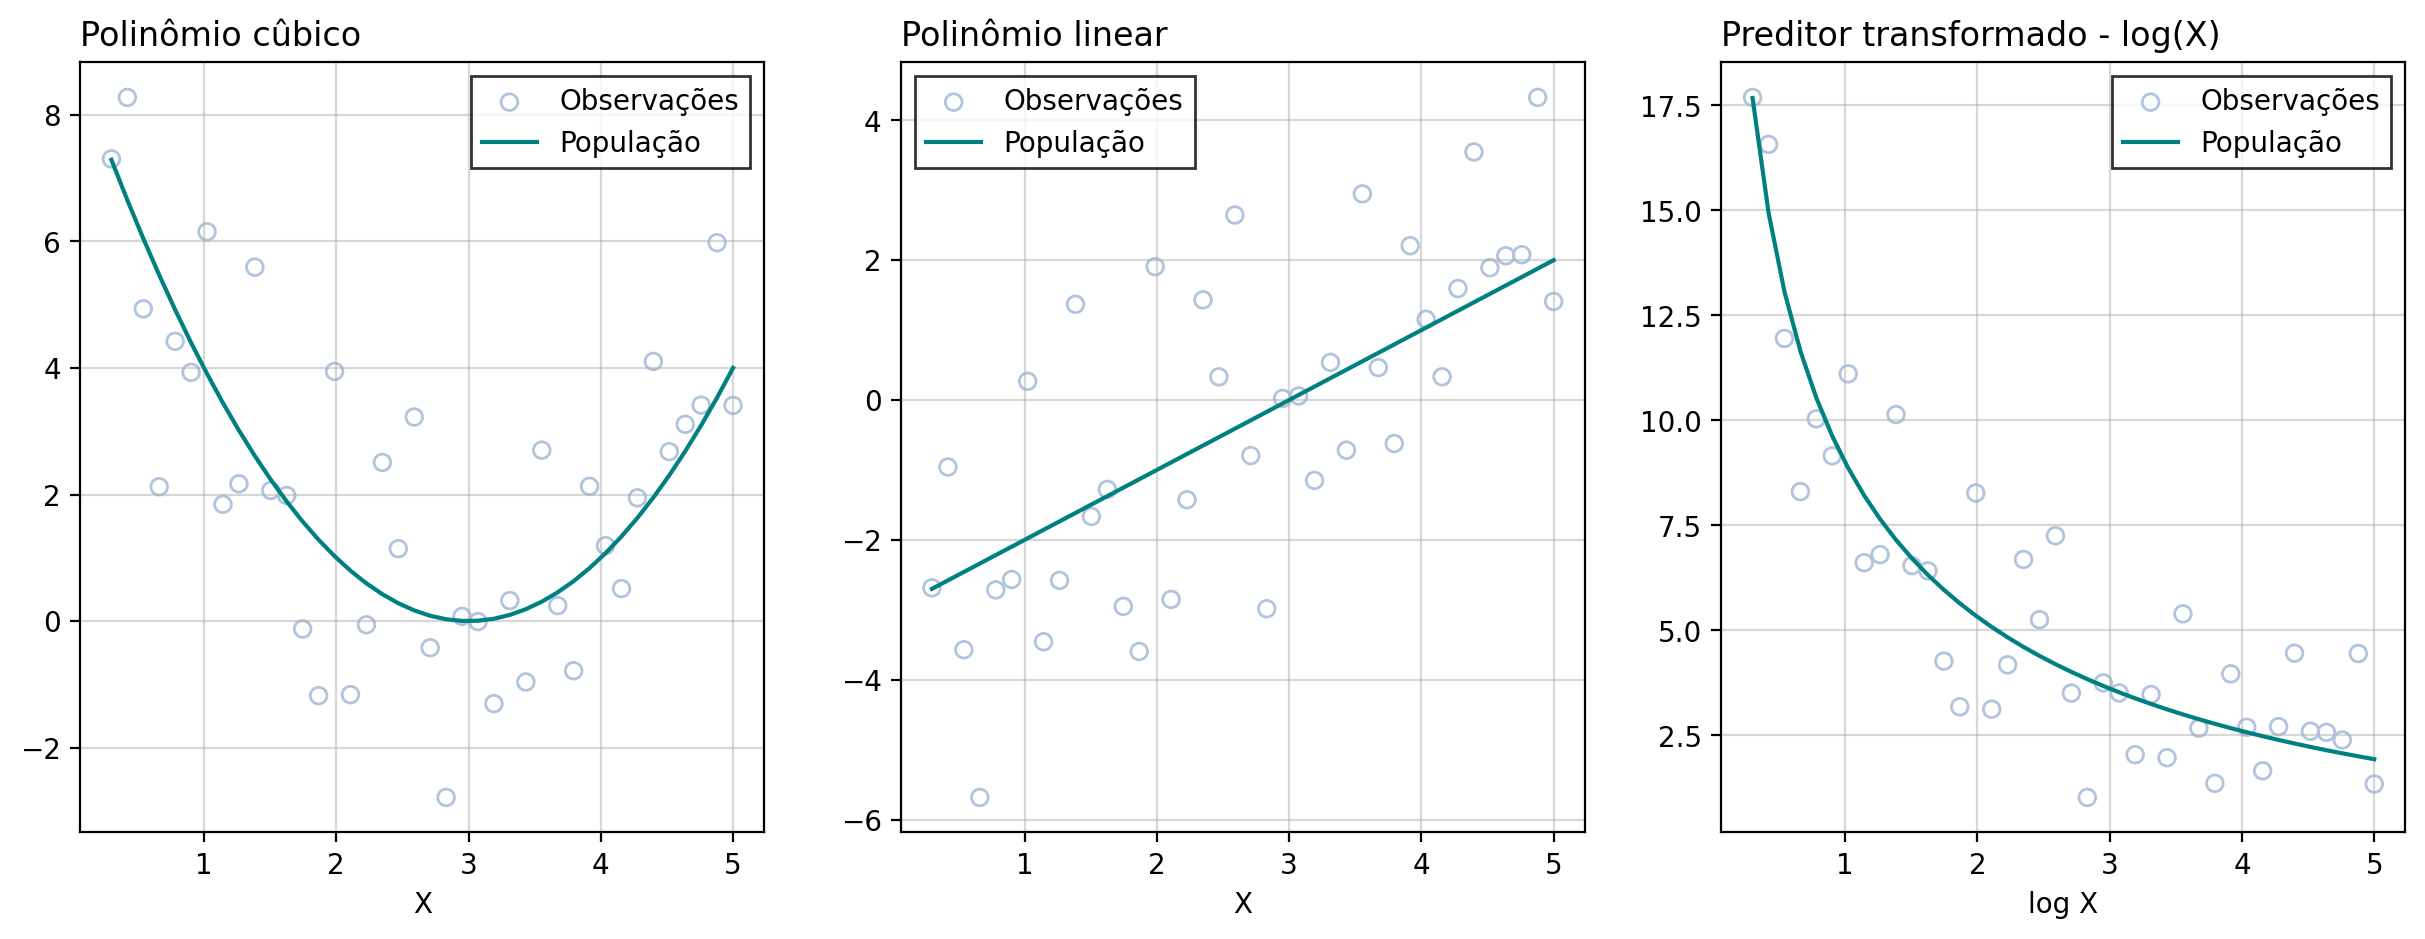

In [3]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharex=True)

# População descrita por polinomio de terceira ordem (cúbico)
axes[0].scatter(x, y_pol+e, edgecolor='lightsteelblue', color='None',label='Observações')
axes[0].plot(x,y_pol, color='teal',label='População')
axes[0].set_xlabel('X')
axes[0].set_title('Polinômio cûbico',loc='left')

# População descrita por polinomio de primeira ordem (linear)
axes[1].scatter(x, y_lin+e, edgecolor='lightsteelblue', color='None',label='Observações')
axes[1].plot(x,y_lin, color='teal',label='População')
axes[1].set_xlabel('X')
axes[1].set_title('Polinômio linear',loc='left')

# População descrita por polinomio de primeira ordem (linear)
axes[2].scatter(x, y_trs+e, edgecolor='lightsteelblue', color='None',label='Observações')
axes[2].plot(x,y_trs, color='teal',label='População')
axes[2].set_xlabel('log X')
axes[2].set_title('Preditor transformado - log(X)',loc='left')

for ax in axes:
    ax.legend(fancybox=False, edgecolor='k')
    ax.grid(alpha=0.5)
plt.show()

Aplicando a regressão linear em cada caso

In [4]:
import statsmodels.api as sm

In [5]:
modelos = []

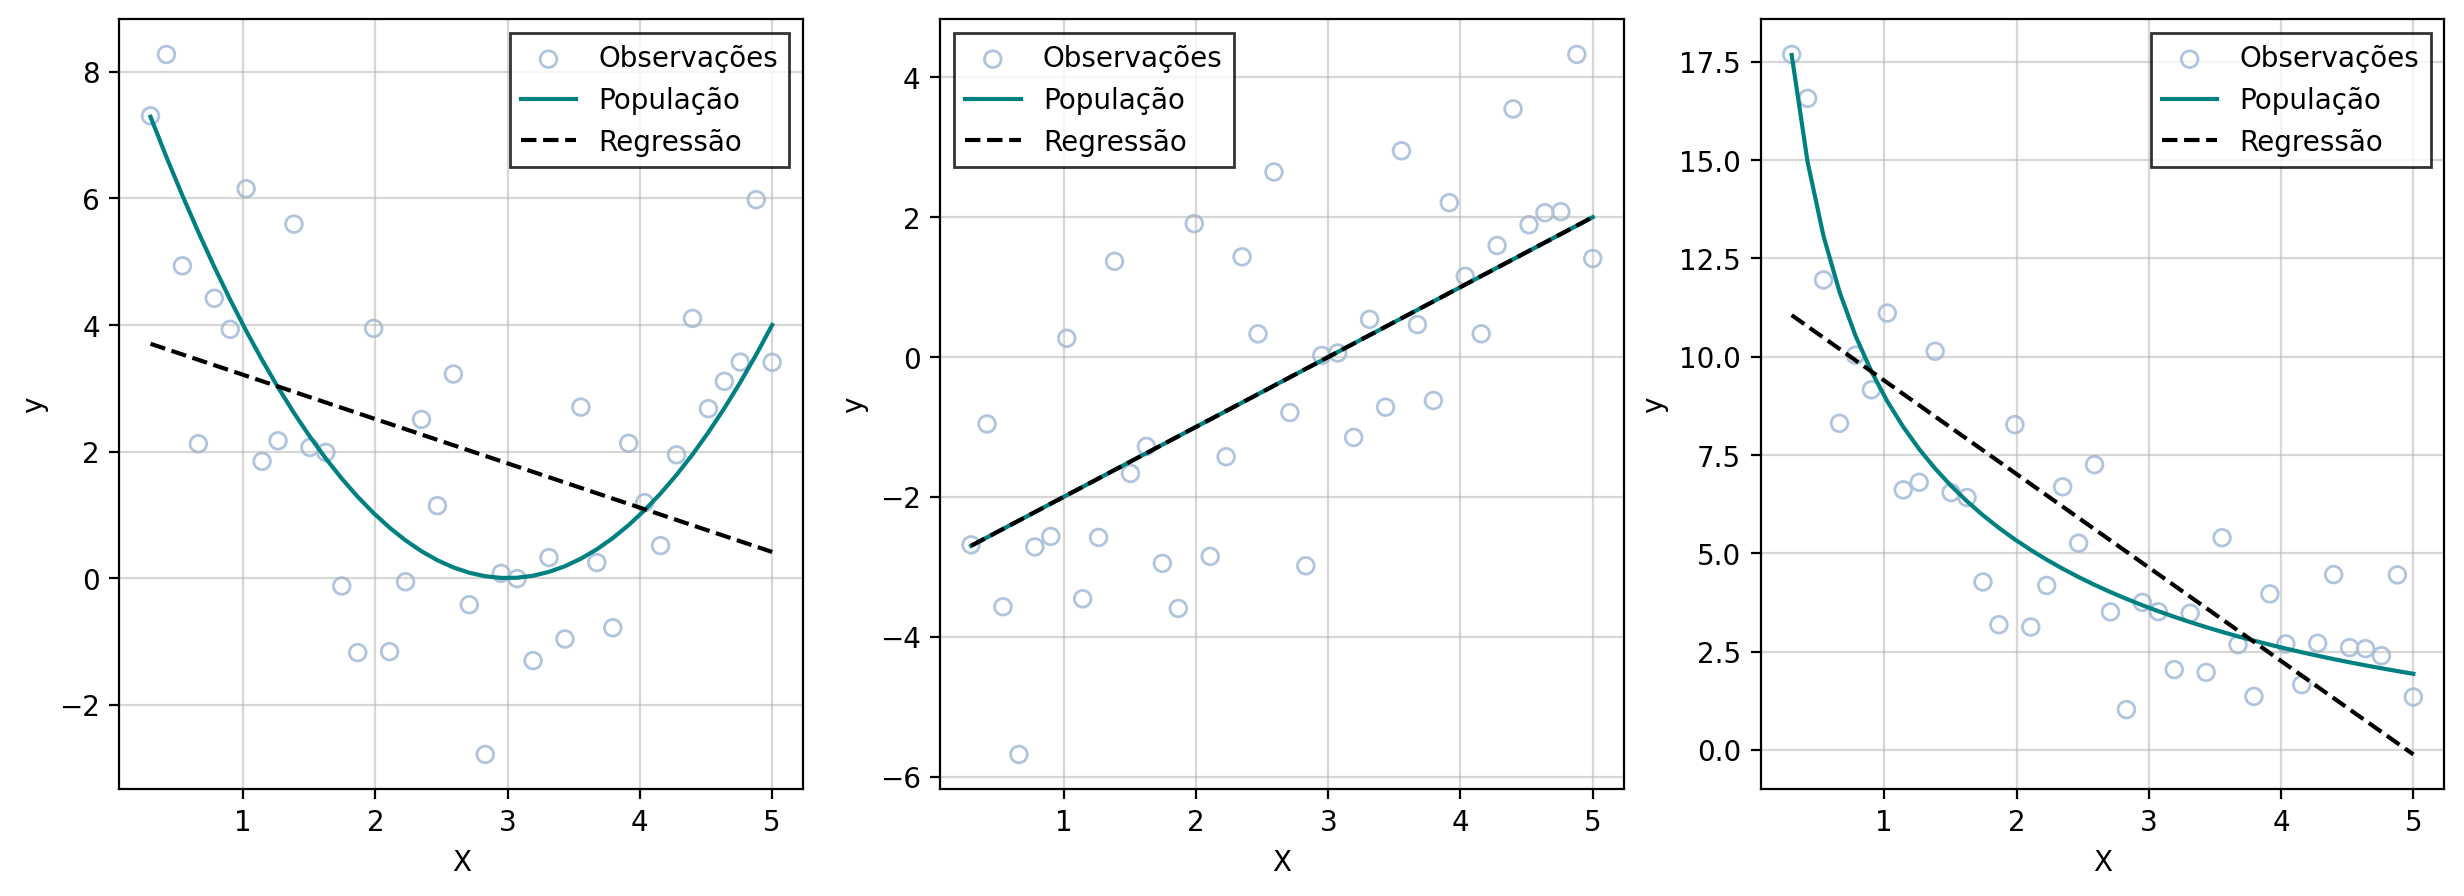

In [6]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

X_train = sm.add_constant(x)
for i, y in enumerate([y_pol, y_lin, y_trs]):

    # Treina modelo
    y_train = y
    modelo = sm.OLS(y_train, X_train).fit()
    modelos.append(modelo)
    
    # Armazena os coeficientes estimados
    beta_0 = modelo.params[0]
    beta_1 = modelo.params[1]

    # Exibe os gráficos
    axes[i].scatter(x,y+e,edgecolor='lightsteelblue', color='None',label='Observações')
    axes[i].plot(x,y,color='teal',label='População')
    axes[i].plot(x,beta_0 + beta_1 * x, color='k',label='Regressão', ls= '--')

    # Adiciona detalhes no gráfico
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('y')
    axes[i].legend(fancybox=False, edgecolor='k')
    axes[i].grid(alpha=0.5)

Naturalmente, o modelo que treinou os dados oriundos da população linear se ajustou perfeitamente ao conjunto de dados de treino. Por outro lado, o modelo que treinou os dados da população modelada como um polinômio cûbico cometeu erros maiores.

In [7]:
nao_linear = modelos[0]
linear = modelos[1]
transformado = modelos[2]

In [11]:
print('População linear')
estatisticas_parametros(linear)

População linear


,Coefficient,Std. error,t-statistic,p-value
Variable,,,,
0,-3.0,0.0,-inf,0.0
1,1.0,0.0,inf,0.0


In [12]:
print('População não linear')
estatisticas_parametros(nao_linear)

População não linear


,Coefficient,Std. error,t-statistic,p-value
Variable,,,,
0,3.912735,0.603547,6.482896,1.241653e-07
1,-0.700000,0.201657,-3.471249,1.306999e-03


In [13]:
print('População transformada')
estatisticas_parametros(transformado)

População transformada


,Coefficient,Std. error,t-statistic,p-value
Variable,,,,
0,11.769397,0.609802,19.300354,3.104904e-21
1,-2.377460,0.203746,-11.668727,3.958827e-14


Ambos os modelos obtiveram *p-values* abaixo do nível de significância estipulado (5%), o que nos faz confiar que de fato há relação entre a respota $y$ e a variável preditora $X$. Contudo, a análise dos *p-values* não nos informa nada quanto a qualidade do ajuste. Sendo assim, iremos precisar avaliar outras métricas.

In [14]:
print(f'Coeficiente R2 da regressão para a população linear: {linear.rsquared}')
print(f'Coeficiente R2 da regressão para a população cubica: {nao_linear.rsquared}')
print(f'Coeficiente R2 da regressão para a população transformada: {transformado.rsquared}')

Coeficiente R2 da regressão para a população linear: 1.0
Coeficiente R2 da regressão para a população cubica: 0.2407527168628658
Coeficiente R2 da regressão para a população transformada: 0.7818088066589588


Calculando o RSE (*Residual Square Error*)

In [15]:
print(f'RSE da regressão para a população linear: {rse(linear,n_obs,1)}')
print(f'RSE da regressão para a população não linear: {rse(nao_linear,n_obs,1)}')
print(f'RSE da regressão para a população transformada: {rse(transformado,n_obs,1)}')

RSE da regressão para a população linear: 0.0
RSE da regressão para a população não linear: 1.7742267466904758
RSE da regressão para a população transformada: 1.7926136278974742


Agora vamos visualizar os resíduos. Como estamos lidando com uma regressão linear simples, irei plotar os dois gráficos: $e_i \times x_i$ e $e_i \times \hat y_i$

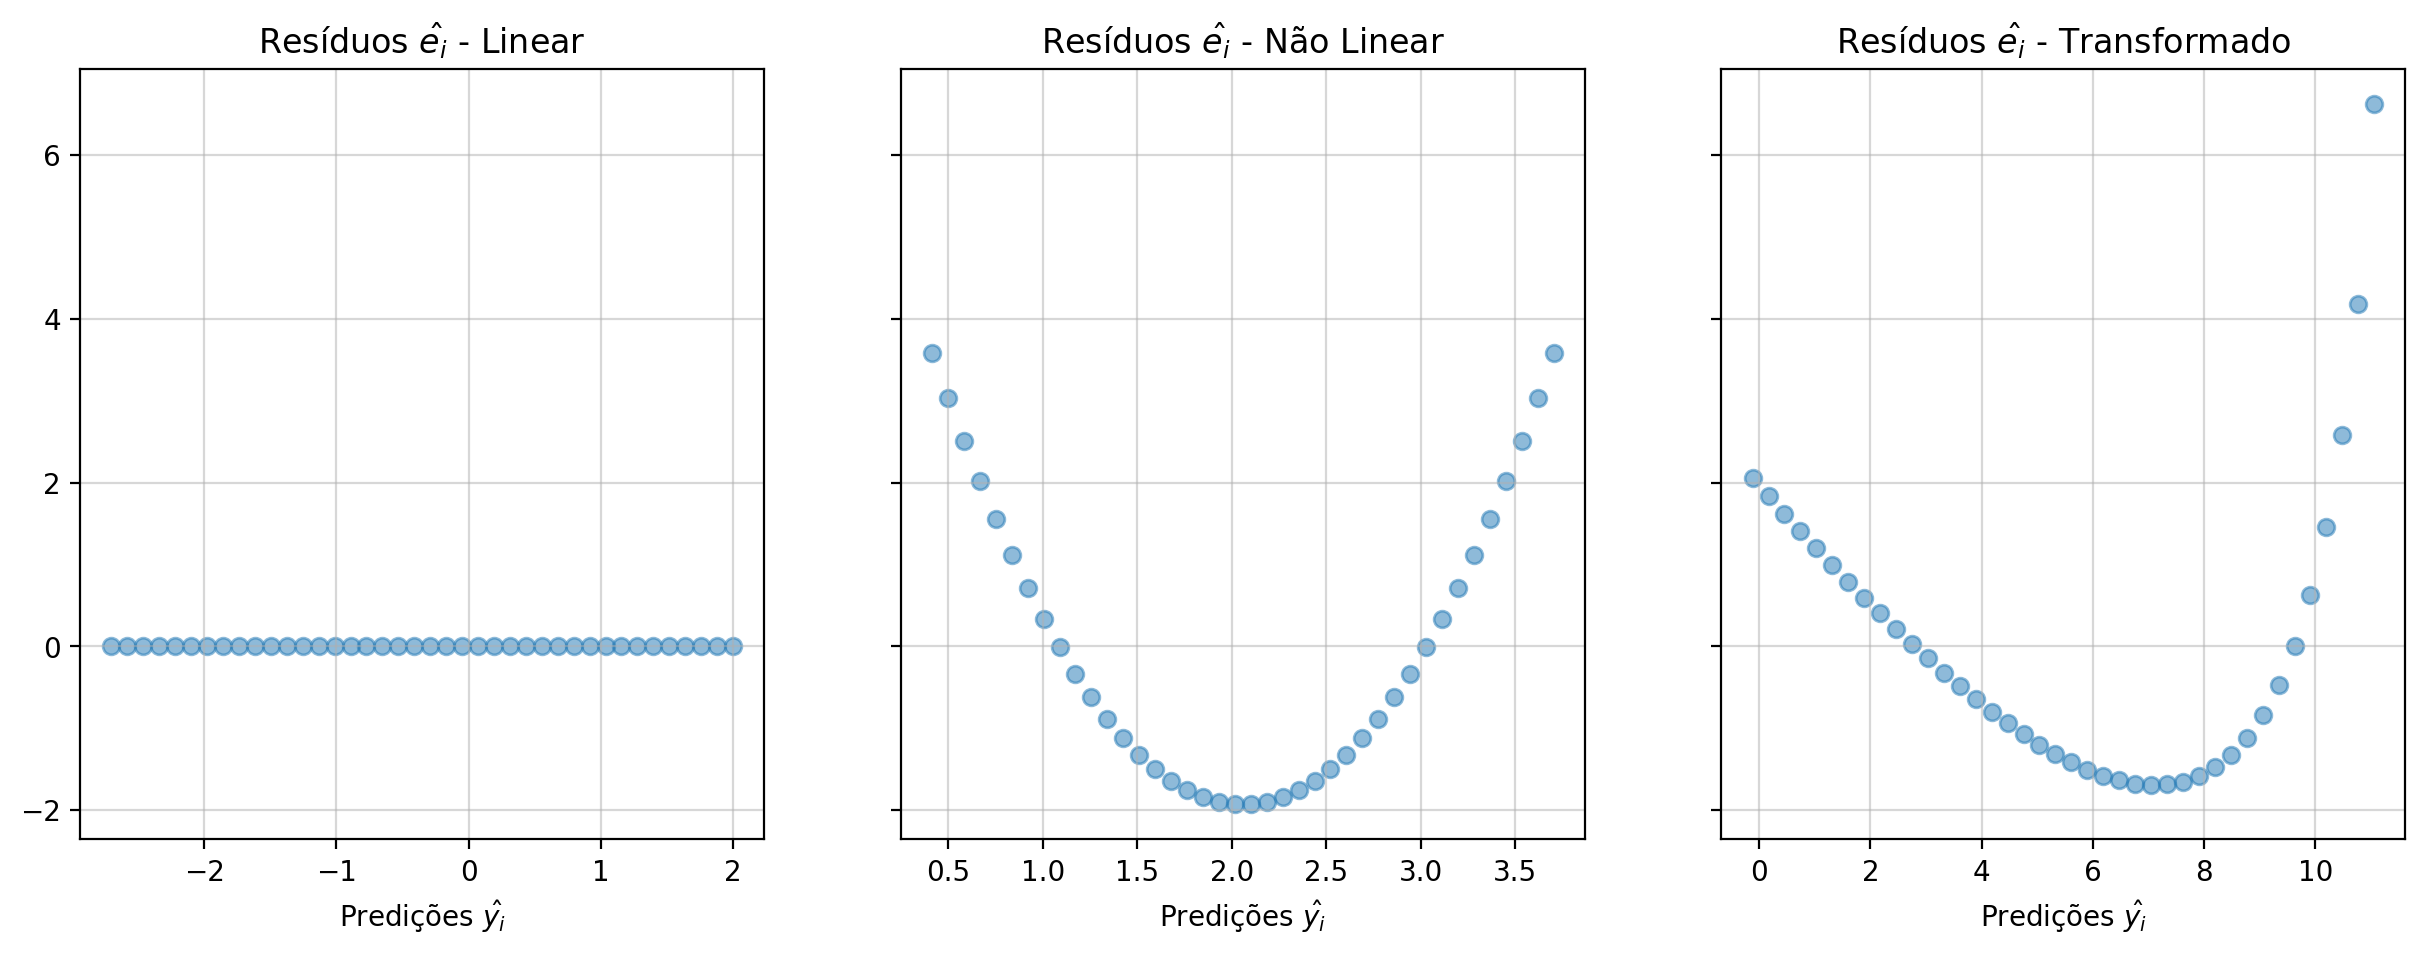

In [16]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharey=True)

for i, (modelo, y) in enumerate(zip([linear,nao_linear,transformado],[y_lin,y_pol,y_trs])):
    y_pred = modelo.predict(X_train)
    residuos = y - y_pred
    axes[i].scatter(y_pred, residuos, alpha=0.5)
    axes[i].set_xlabel(r'Predições $\hat{y_i}$')
    axes[i].grid(alpha=0.5)

axes[0].set_title(r'Resíduos $\hat{e_i}$ - Linear')
axes[1].set_title(r'Resíduos $\hat{e_i}$ - Não Linear')
axes[2].set_title(r'Resíduos $\hat{e_i}$ - Transformado')

plt.show()

### Digressão sobre resíduos

$$
y = f(X) + \varepsilon
$$

**Assumindo** que $f(X)$ é linear, temos

$$
e_i = y_i -\hat y_i
$$

$$
e_i = \beta_0 + \beta_1 x_i + \varepsilon_i - \hat\beta_0 - \hat\beta_1 x_i
$$

Reorganizando os termos, temos:

$$
e_i = (\beta_0 -  \hat\beta_0) + (\beta_1 - \hat\beta_1)x_i + \varepsilon_i 
$$

Calculando o valor esperado dos dois lados

$$
\mathbb{E}[e_i] = \mathbb{E}[(\beta_0 - \hat\beta_0)] + x_i\mathbb{E}[(\beta_1 - \hat\beta_1)] + \mathbb{E}[\varepsilon_i]
$$

Como $\beta_j$ é um estimador não enviesado, então $\mathbb{E}[\hat \beta_j] = \beta_j \quad ,\forall j \in (1,2,...)$. Substituindo na expressão acima, ficamos com:

$$
\mathbb{E}[e_i] = 0+x_i\cdot 0 + \mathbb{E}[\varepsilon_i] \qquad \therefore \qquad \mathbb{E}[e_i] = \mathbb{E}[\varepsilon_i]
$$

> Portanto, **se os erros tiverem média zero**, os resíduos também a terão. Esse resultado nos permite concluir que $e_i$ possui média zero

### Funções auxiliares

In [9]:
def estatisticas_parametros(model):
    summary = {
        'Coefficient': model.params,
        'Std. error': model.bse,
        't-statistic': model.tvalues,
        'p-value': model.pvalues
    }
    
    # Criando a tabela em DataFrame
    results_table = pd.DataFrame(summary)
    results_table.index.name = 'Variable'
    
    # Exibindo a tabela
    return results_table

In [10]:
def rse(modelo, n, p):
    residuos = modelo.resid
    RSS = np.sum(residuos**2)
    return np.sqrt(RSS / (n - p - 1))